In [1]:
#!pip install pandas
#!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
cars = cars.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [4]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [5]:
#On supprime les lignes avec des valeurs nulles
cars = cars.dropna()

cars.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

In [6]:
#exemple pour selectionner plusieurs colonnes 
X_texte = pd.DataFrame(data=cars,columns=['manufacturer_name','model_name','color','engine_fuel','engine_type','transmission','body_type','state','drivetrain','location_region'])

In [9]:
#transforme une colonne en one hot
def texte_to_hot(X_column):  
    onehotencoder = sklearn.preprocessing.OneHotEncoder(categories='auto')
    X_column = onehotencoder.fit_transform(X_column.reshape(-1,1))
    return X_column

#ajoute une colonne transformé en one hot au data frame
#on ajoute une colonne pour chaque valeur unique 
def add_oneHot(X_data,array_name,oneHot):
    for i in range(len(array_name)):
        X_data[array_name[i]] = oneHot[:,i] 
    return X_data

#a partir d'un data frame recupere toutes les colonnes de texte 
#pour chacunes d'elles on les transforme en one hot et ajoute au data frame
def convert_data_oneHot(X):
    colonnes_texte = X.select_dtypes(include=['object'])
    for name in colonnes_texte.columns:
        X = X.drop(columns=[name])
        unique_name = np.unique(colonnes_texte[name])
        onehot = texte_to_hot(colonnes_texte[name].values)
        X = add_oneHot(X,unique_name,onehot.toarray())
    return X

In [10]:
def convert_bool(X):#TODO
    colonnes_texte = X.select_dtypes(include=['object'])

In [11]:
#k est un hyper-parametre qui demande plus de test car si la cette colonne est influante on doit affiner pour 
#ne pas desequilibrer le dataset avec un model 'other_model' trop imposant
def add_model_name(X,k):
    model_names, frequency = np.unique(X['model_name'],return_counts = True)
    X['model_name'] = X['model_name'].replace(model_names[frequency < k],'other_model')
    return X

#debug print de la frequence apres la mise à jour 
#model_names, frequency = np.unique(cars['model_name'],return_counts = True)
#print(frequency)

In [12]:
#ancienne features sans utiliser les colonnes de texte
#features = cars.drop(columns=['manufacturer_name','model_name','color','engine_fuel','engine_type','transmission','body_type','state','drivetrain','location_region'])
#print(features)
features = cars.drop(columns=['price_usd'])
label = cars['price_usd']

#optionel, reste a debattre si on veut vraiment utiliser
#et si oui on devra faire un traitement supplementaire pour rassembler les models avec peut de lignes
#features = features.drop(columns=['model_name'])
features = add_model_name(features,100);

features = convert_data_oneHot(features)

#print(features.shape)
#print les colonnes afin de verifier si on a bien mis toutes les valeurs
#for i in features.columns:
#    print(i)


In [13]:
X = features.values
Y = label.values

In [14]:
test_ratio = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)

In [15]:
alpha_etoile = 0.1
monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)

In [16]:
monModele.fit(X_train, Y_train)
Y_train_pred = monModele.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = monModele.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

train error 9704561.87684494
test error 10445095.334830688


In [17]:
xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

<ipython-input-18-113a42a1dae4>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


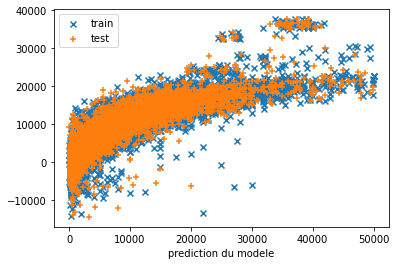

In [18]:
fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir

ax = fig.add_subplot(111)
